In [5]:
## importing various modules useful for this analysis

#--------fundamental modules-----
import os
import pandas as pd
import tqdm as tqdm
from scipy import stats
import numpy as np
import string

#-------visulizaiton modules-----

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot,plot,init_notebook_mode
init_notebook_mode(connected= True)

import squarify
import geopandas as gpd

!pip install country_converter --upgrade
import country_converter as coco

from wordcloud import WordCloud, STOPWORDS


#______warningfilter module____________
import warnings
warnings.filterwarnings('ignore')


## setting pandas dataframe settings

plt.rcParams['figure.dpi'] = 150

### positioning all the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
             display: table-cell;
             text-align: center;
             vertical-align: middle;
}
""")

In [6]:
# loading dataset
df = pd.read_csv('netflix_titles.csv')

df.sample(10).head(3).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black'})

In [7]:
# basic information of the data
df.info(verbose = True);

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe(include=[object]).T.style.set_properties(**{
    'background-color': 'white',
    'color': 'black',
    'border-color': 'black'
})

In [9]:
df.describe(include = [np.number]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black'})

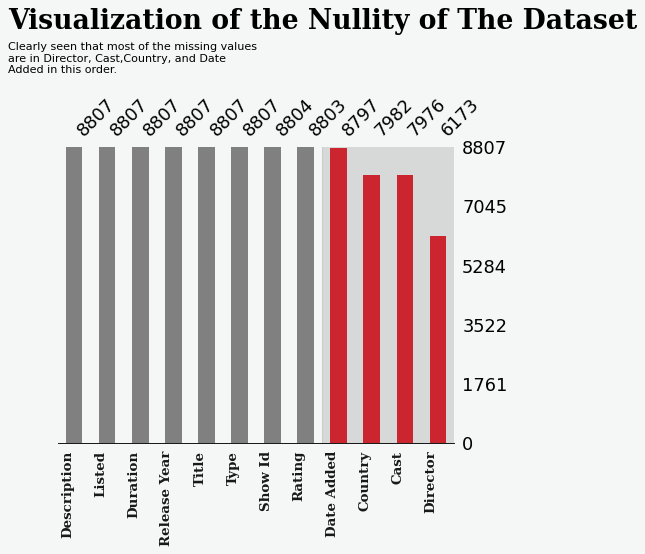

In [10]:
fig, ax = plt.subplots(dpi = 80)
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

color = ['grey','grey','grey','grey','grey','grey','grey','grey','#E50914','#E50914','#E50914','#E50914']
msno.bar(df,fontsize =16, color = color, sort = 'descending', ax = ax, figsize = (12,6))
labels = ['Description','Listed','Duration', 'Release Year', 'Title', 'Type','Show Id','Rating', 'Date Added','Country', 'Cast','Director']
ax.set_xticklabels(labels, fontdict={'font': 'serif', 'color': 'black', 'weight': 'bold', 'size': 12}, alpha=0.9, rotation=90)
ax.text(-2,1.4,'Visualization of the Nullity of The Dataset' ,{'font':'serif', 'color':'black','weight':'bold','size':24})
ax.text(-2,1.25,'Clearly seen that most of the missing values \nare in Director, Cast,Country, and Date \nAdded in this order.')
ax.axvspan(7.5,12.5,0,7787, color = 'grey', alpha = 0.25)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
fig.show()

In [11]:
df_orig = df.copy() # copying original dataset 

# handling missing values
df['director'] = df['director'].fillna('NoDataAvailable')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'] = df['cast'].fillna('NoDataAvailable')
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
print('count of values')
print(df.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


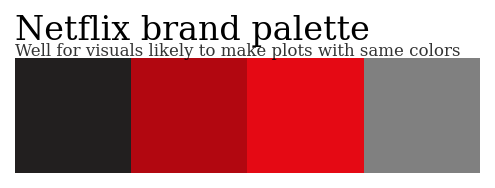

In [12]:
# Netflix brand colors
colors = ['#221f1f', '#b20710', '#e50914','grey']

#custom color palette
#customPalette = sns.set_palette(sns.color_palette(colors))
sns.palplot(colors,size = 1)
plt.title("Netflix brand palette ",loc='left',fontfamily= 'Serif',fontsize=16,y=1.05)
plt.text(-0.5,-0.52, 'Well for visuals likely to make plots with same colors',{'font':'serif', 'color':'black','weight':'normal','size':8}, alpha = 0.8 )
plt.axis('off')
fig.show()

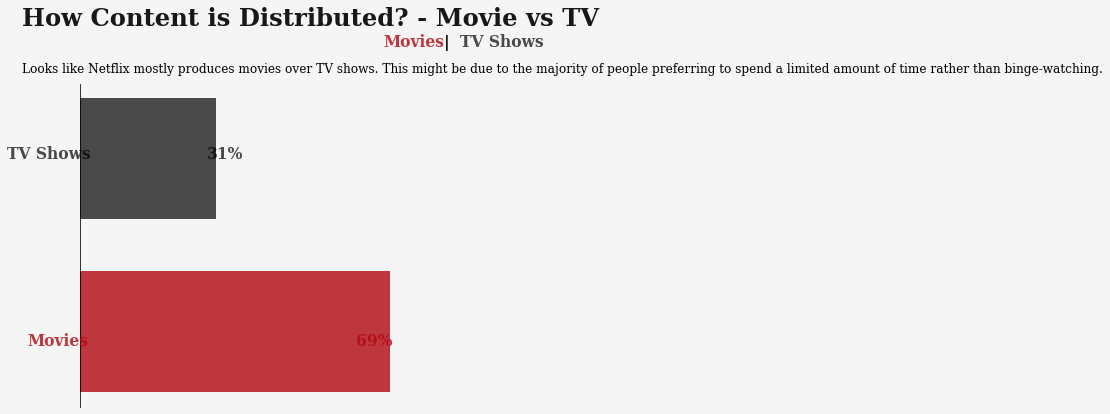

In [13]:
x = df['type'].value_counts()

# plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.values[1], height=0.7, color='black', alpha=0.7)
plt.text(-1450, 1, 'TV Shows', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': 'black'}, alpha=0.7)
plt.text(2500, 1, '31%', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': 'black'}, alpha=0.7)

ax.barh([0], x.values[0], height=0.7, color='#b20710', alpha=0.8)
plt.text(-1050, -0.08, 'Movies', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'style': 'normal', 'color': '#b20710'}, alpha=0.8)
plt.text(5450, -0.08, '69%', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#b20710'}, alpha=0.8)

fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150, 1.77, 'How Content is Distributed? - Movie vs TV', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': 'black'}, alpha=0.9)
plt.text(6000, 1.65, 'Movies', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': '#b20710'}, alpha=0.8)
plt.text(7200, 1.65, '|', {'color': 'black', 'size': 16, 'weight': 'bold'}, alpha=0.9)
plt.text(7500, 1.65, 'TV Shows', {'font': 'Serif', 'weight': 'bold', 'size': 16, 'color': 'black'}, alpha=0.7)
plt.text(-1150, 1.5, 'Looks like Netflix mostly produces movies over TV shows. This might be due to the majority of people preferring to spend a limited amount of time rather than binge-watching.', {'font': 'Serif', 'size': 12.5, 'color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


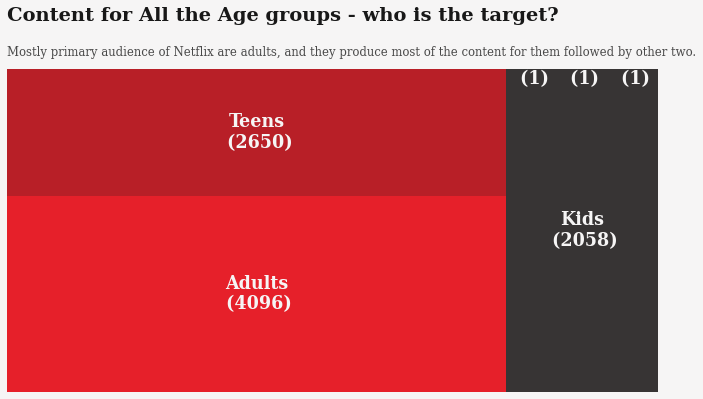

In [14]:
rating = {
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'PG': 'Kids',
    'TV-PG': 'Kids',
    'PG-13': 'Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-MA': 'Adults',
    'NC-17': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'TV-Y7-FV': 'Kids',
    'G': 'Kids'
}

# 创建一个新的列来表示年龄评级
df['age_rating'] = df['rating'].replace(to_replace=rating)

age_ratings = df['age_rating'].value_counts()

labels = [str(idx) + "\n (" + str(val) + ")" for idx, val in age_ratings.items()]

fig, ax = plt.subplots(figsize=(12, 6), dpi=70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

squarify.plot(sizes=age_ratings.values, label=labels,
              color=['#e50914', '#b20710', '#221f1f'],
              ax=ax, text_kwargs={'font': 'serif', 'fontsize': 18, 'color': '#f6f5f5', 'weight': 'bold'},
              alpha=0.9)

ax.text(0, 114.8, 'Content for All the Age groups - who is the target?', {'font': 'serif', 'fontsize': 20, 'color': 'black', 'weight': 'bold'}, alpha=0.9)
ax.text(0, 104, 'Mostly primary audience of Netflix are adults, and they produce most of the content for them followed by other two.', {'font': 'serif', 'fontsize': 12, 'color': 'black', 'weight': 'normal'}, alpha=0.7)

ax.axis('off')
plt.show()

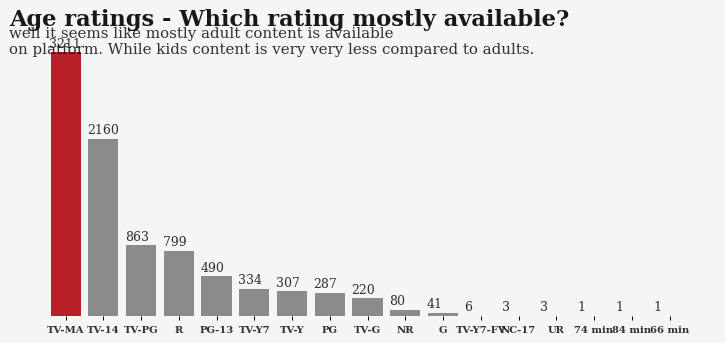

In [15]:
fig, ax = plt.subplots(figsize = (10,4), dpi = 90)
ax.set_facecolor('#f6f5f5')
fig.patch.set_facecolor('#f6f5f5')

a = df['rating'].value_counts()
colors = ['#b20710','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']
ax.bar(x = a.index, height = a.values, color = colors, alpha = 0.9)

# Create labels
label = a.values.tolist()
 
# Text on the top of each bar
for i in range(len(label)):
    x = i  - 0.35
    y = (i+18)/2 + label[i]
    x = x-0.08
    y = y + 52
    ax.text(x,y, '{}'.format(a.values[i]),{'font': 'serif', 'weight': 'normal', 'color': 'black', 'fontsize': 10}, alpha = 0.8)

#ax.set_xticks(a.values)
ax.text(-1.5,3540, 'Age ratings - Which rating mostly available?', {'font': 'serif', 'color': 'black', 'fontsize': 18, 'weight':'bold'},alpha = 0.9 )
ax.text(-1.5,3200, 'well it seems like mostly adult content is available \non platform. While kids content is very very less compared to adults. ', {'font': 'serif', 'color': 'black', 'fontsize': 12,},alpha = 0.8)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
    
ax.set_xticklabels(a.index, fontdict={'font': 'serif', 'color': 'black', 'fontsize': 8, 'weight': 'bold'}, alpha=0.8)
ax.axes.get_yaxis().set_visible(False)
fig.show()

In [16]:
# converting the pandas dataframe to datatime format
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year'] = df['date_added'].dt.year
df['added_month'] = df['date_added'].dt.month
df['added_month_name'] = df['date_added'].dt.month_name()


# creating a series of time data

add_year = df['added_year'].value_counts()
release = df['release_year'].value_counts()

# creating a dataframe

add_df = pd.DataFrame({'year': add_year.index, 'added_year': add_year.values})
release_df = pd.DataFrame({'year': release.index, 'release_year': release.values})

year_df = pd.merge(add_df, release_df, how = 'right', on = 'year')
year_df.fillna('0', inplace = True)
year_df['added_year'] = year_df.added_year.astype('int')

year_df = year_df.sort_values('year', ascending = False).reset_index(drop = True)



ValueError: time data " August 4, 2017" doesn't match format "%B %d, %Y", at position 1441. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
## visulaization

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'Released content', 'Added content ']

# stackplot
ax.stackplot(year_df.year[0:15], year_df.release_year[0:15],year_df.added_year[0:15],labels =labels, 
              colors = ['#221f1f','#b20710',], baseline = 'zero', alpha = 0.9 )

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.2)
ax.text(2019.25, 3100, 'Covid-19', {'font':'serif', 'fontsize': '14', 'color': 'black', 'weight':'bold'},alpha = 0.8)

# legend
ax.text(2017, 2000, '{}'.format(labels[1]), {'font':'serif', 'fontsize':'14', 'color':'#f6f5f5', 'weight':'bold'})
ax.text(2016, 500, '{}'.format(labels[0]),{'font':'serif', 'fontsize':'14', 'color':'#f6f5f5','weight':'bold'})

#title
 
ax.text(2006.5, 3600, 'Visualization of Yearwise Leadtimes - How quick content added?', 
                      {'font':'serif', 'fontsize':'16', 'weight': 'bold','color': 'black'})
ax.text(2006.5, 3390, 'Looks like as internet is booming gap between content official \nrelease time and available time to platform is drastically reduced. ',
                      {'font':'serif', 'fontsize':'12','color': 'black'})


plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
fig.show()

In [ ]:
TV = df[df['type'] == 'TV Show'].release_year.value_counts()
Movie = df[df['type'] == 'Movie'].release_year.value_counts()

# creating a dataframe

Tv_df = pd.DataFrame({'year': TV.index, 'Tv_count': TV.values})
Movie_df = pd.DataFrame({'year': Movie.index, 'Movie_count': Movie.values})

rel_data = pd.merge(Tv_df, Movie_df, how = 'right', on = 'year')
rel_data.fillna('0', inplace = True)
rel_data['Tv_count'] = rel_data.Tv_count.astype('int64')
rel_data = rel_data.sort_values('year', ascending = False).reset_index(drop = True)

## visulaization

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'TV shows', 'Movies ']

# stackplot
ax.stackplot(rel_data.year[0:25], rel_data.Tv_count[0:25],rel_data.Movie_count[0:25],labels =labels, 
              colors = ['#221f1f','#b20710',], baseline = 'zero', alpha = 0.9 )

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.2)
ax.text(2019, 1147, 'Covid-19', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

# legend
ax.text(2017, 700, '{}'.format(labels[1]), {'font':'serif', 'fontSize':'14', 'color':'#f6f5f5', 'weight':'bold'})
ax.text(2016, 175, '{}'.format(labels[0]),{'font':'serif', 'fontSize':'14', 'color':'#f6f5f5','weight':'bold'}) 

#title
 
ax.text(1997.25,1200, 'Visualization of Release Year - Which year is most productive?',
                      {'font':'serif', 'fontSize':'16', 'weight': 'bold','color': 'black'})
ax.text(1997.5,1000, 'In the earlier days of Tv shows were not that popular \nit seems, with time gain popularity and rose to certain \nlevel. Where as movies are in top \nchoice of production. ',
                      {'font':'serif', 'fontSize':'12','color': 'black'})

plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
fig.show()

In [ ]:
TV = df[df['type'] == 'TV Show'].added_year.value_counts()
Movie = df[df['type'] == 'Movie'].added_year.value_counts()

# creating a dataframe

Tv_df = pd.DataFrame({'year': TV.index, 'Tv_count': TV.values})
Movie_df = pd.DataFrame({'year': Movie.index, 'Movie_count': Movie.values})

add_data = pd.merge(Tv_df, Movie_df, how = 'right', on = 'year')
add_data.fillna('0', inplace = True)
add_data['Tv_count'] = add_data.Tv_count.astype('int64')
add_data = add_data.sort_values('year', ascending = False).reset_index(drop = True)

## visulaization

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ 'TV shows', 'Movies ']

# stackplot
ax.stackplot(add_data.year[0:25], add_data.Tv_count[0:25],add_data.Movie_count[0:25],labels =labels, 
              colors = ['#221f1f','#b20710',], baseline = 'zero', alpha = 0.9 )

# Region of interest
 
ax.axvspan(2019,2021, color = 'grey',alpha = 0.2)
ax.text(2019.5, 2200, 'Covid-19', {'font':'serif', 'fontsize': '11', 'color': 'black', 'weight':'bold'},alpha = 0.8)

# legend
ax.text(2018, 800,'{}'.format(labels[1]), {'font':'serif', 'fontSize':'14', 'color':'#f6f5f5', 'weight':'bold'})
ax.text(2017, 200, '{}'.format(labels[0]),{'font':'serif', 'fontSize':'14', 'color':'#f6f5f5','weight':'bold'}) 

#title
 
ax.text(2007.5,2300, 'Visualization of Addition Year - Which year is best entertariment year?',
                      {'font':'serif', 'fontSize':'16', 'weight': 'bold','color': 'black'})
ax.text(2007.5,1990, 'Since the inception of the netflix, most of \nthe content was added recent times. After 2015 \nrapid addition of the content can be seen from the visualization. ',
                      {'font':'serif', 'fontSize':'12','color': 'black'})

plt.box(on = None)

ax.axes.get_yaxis().set_visible(False)
fig.show()

In [ ]:
added_month = df['added_month'].value_counts()

# initialize the figure
fig = plt.figure(figsize=(14,7), dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax = plt.subplot(polar=True)
plt.axis('off')


## labels
label_map = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
lab = added_month.index
labels = lab.map(label_map)

colors = ['#b20710', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']


# Constants = parameters controling the plot layout:
upperLimit = 1000
lowerLimit = 50
labelPadding = 10

# Compute max and min in the dataset
max = added_month.max()

slope = (max - lowerLimit) / max
heights = slope * added_month.values + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(added_month.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(added_month)+1))
angles = [element * width for element in indexes]


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#f6f5f5",
    color = colors,
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",**{'font':'serif', 'size':12, 'weight':'bold','color':'black'},alpha = 0.8) 

fig.text(0.25,1.05,'Monthly content addition - Best Bing Month!!',{'font':'serif', 'size':20, 'weight':'bold','color':'black'})
fig.text(0.25,0.975,'Christmas is real holiday!! most of the content was \nadding to platfrom at the end of the year ans \nnewyear for holiday season.',{'font':'serif', 'size':12,'color':'black'}, alpha = 0.7)
fig.show()

In [ ]:
country = df.country.value_counts()

coun = {}
for idx, val in country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in coun.keys():
            d = {}
            d[i] = val + coun[i]
            coun.update(d)
        else:
            d = {i:val}
            coun.update(d)

nation, count = [],[]
for idx, val in coun.items():
    nation.append(idx)
    count.append(val)

temp = (pd.DataFrame({'country':nation, 'count': count})
        .sort_values('count', ascending = False))

temp['color'] = temp['count'].apply(lambda x : '#b20710' if x > temp['count'].values[3] else 'grey')
# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= temp['count'][0:24], label = temp['country'][0:24], ax = ax, color = temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'Best Country of The Netflix: TOP 25 Countries vs Total Content',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,107, 'This visualization shows the countrywise contribution to content on the platform. \nSeems like USA is winner in overall content, this includes TV and movies, followed by,India.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

In [ ]:
temp['color'] = temp['count'].apply(lambda x : '#b20710' if x > temp['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
temp['iso_code'] = coco.convert(names=temp['country'], to ='ISO3')
temp = temp[temp['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
temp_map = world.merge(temp,left_on = 'iso_a3', right_on = 'iso_code')

temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
temp_map = temp_map.sort_values(by = 'count', ascending = False)


#viualization
colors = ['#b20710','grey','#f8f9f9',]
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)

fig, ax  = plt.subplots(figsize = (15,7.5), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
temp_map.dropna().plot(column = 'count', 
                       color = temp_map.dropna()['color'], 
                       cmap = cmap,
                       scheme='quantiles', 
                       k=10, legend = False,
                       ax = ax)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.text(-200,104,'Which Countries are Producting Most of the Content? - World vs Whole Content', {'font':'serif', 'size':16, 'weight':'bold'}, alpha = 0.9)
ax.text(-199,87,'World map show the contry wise production of content, seems like mostly contries \nin africa are least contributing to the content. Where as most of the \ndeveloped countries are being on top.', {'font':'serif', 'size':12}, alpha = 0.7)
fig.show()

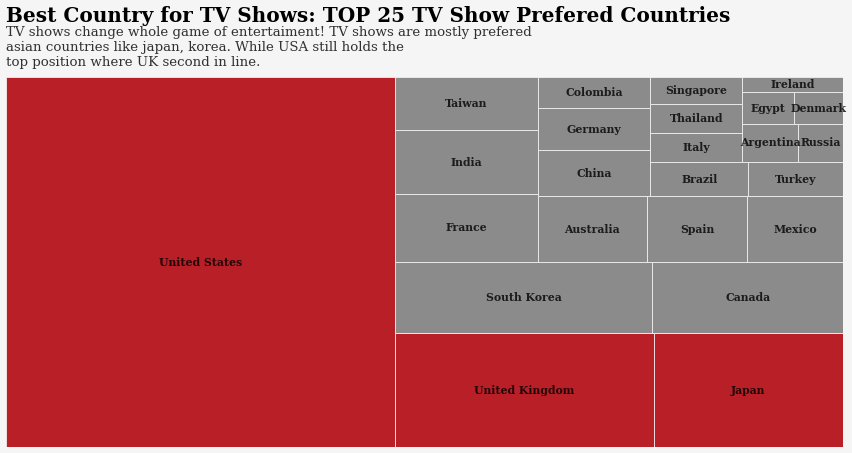

In [17]:
## TV show countrywise distribution

TV = df[df['type'] == 'TV Show']


TV_country = TV.country.value_counts()

TV_coun = {}
for idx, val in TV_country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in TV_coun.keys():
            d = {}
            d[i] = val + TV_coun[i]
            TV_coun.update(d)
        else:
            d = {i:val}
            TV_coun.update(d)

TV_nation, TV_count = [],[]
for idx, val in TV_coun.items():
    TV_nation.append(idx)
    TV_count.append(val)

TV_temp = (pd.DataFrame({'country':TV_nation, 'count': TV_count})
        .sort_values('count', ascending = False))
TV_temp['color'] = TV_temp['count'].apply(lambda x : '#b20710' if x > TV_temp['count'].values[3] else 'grey')

# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= TV_temp['count'][0:24], label = TV_temp['country'][0:24], ax = ax, color = TV_temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'Best Country for TV Shows: TOP 25 TV Show Prefered Countries ',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,103, 'TV shows change whole game of entertaiment! TV shows are mostly prefered \nasian countries like japan, korea. While USA still holds the \ntop position where UK second in line.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

West Germany not found in regex
 not found in regex


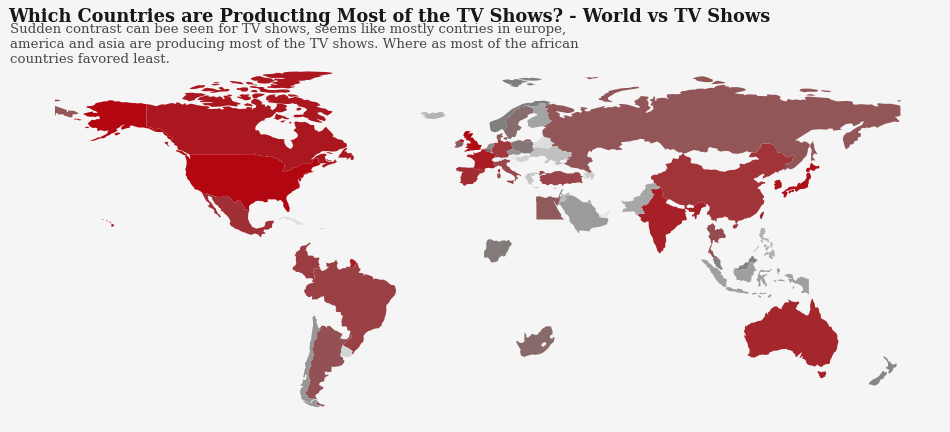

In [18]:
TV_temp['color'] = TV_temp['count'].apply(lambda x : '#b20710' if x > TV_temp['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
TV_temp['iso_code'] = coco.convert(names=TV_temp['country'], to ='ISO3')
TV_temp = TV_temp[TV_temp['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
temp_map = world.merge(TV_temp,left_on = 'iso_a3', right_on = 'iso_code')

temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
temp_map = temp_map.sort_values(by = 'count', ascending = False)


#viualization
colors = ['#b20710','grey','#f8f9f9',]
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)

fig, ax  = plt.subplots(figsize = (15,7.5), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
temp_map.dropna().plot(column = 'count', 
                       color = temp_map.dropna()['color'], 
                       cmap = cmap,
                       scheme='quantiles', 
                       k=10, legend = False,
                       ax = ax)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.text(-200,104,'Which Countries are Producting Most of the TV Shows? - World vs TV Shows', {'font':'serif', 'size':16, 'weight':'bold'}, alpha = 0.9)
ax.text(-199,87,'Sudden contrast can bee seen for TV shows, seems like mostly contries in europe, \namerica and asia are producing most of the TV shows. Where as most of the african \ncountries favored least.', {'font':'serif', 'size':12}, alpha = 0.7)
fig.show()

In [19]:
## Movies countrywise distribution

Movies = df[df['type'] == 'Movie']


Movi_country = Movies.country.value_counts()

Movi_coun = {}
for idx, val in Movi_country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in Movi_coun.keys():
            d = {}
            d[i] = val + Movi_coun[i]
            Movi_coun.update(d)
        else:
            d = {i:val}
            Movi_coun.update(d)

Movi_nation, Movi_count = [],[]
for idx, val in Movi_coun.items():
    Movi_nation.append(idx)
    Movi_count.append(val)

Movi_temp = (pd.DataFrame({'country':Movi_nation, 'count': Movi_count})
        .sort_values('count', ascending = False))

Movi_temp['color'] = Movi_temp['count'].apply(lambda x : '#b20710' if x > Movi_temp['count'].values[3] else 'grey')

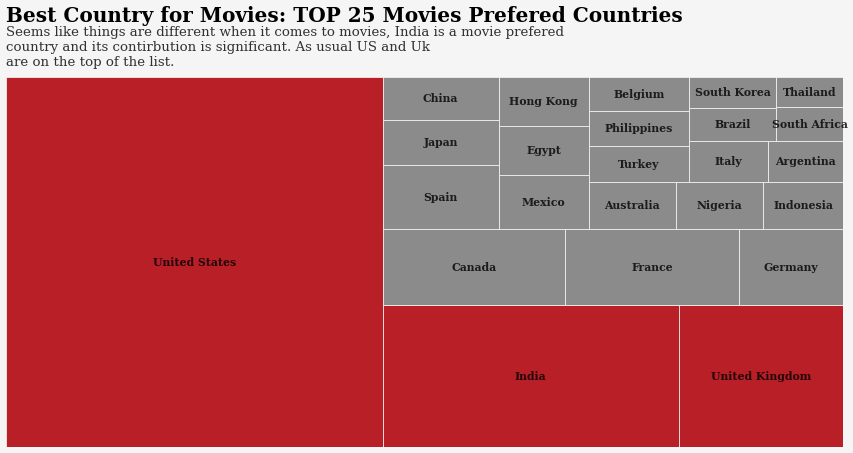

In [20]:
# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= Movi_temp['count'][0:24], label = Movi_temp['country'][0:24], ax = ax, color = Movi_temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'Best Country for Movies: TOP 25 Movies Prefered Countries ',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,103, 'Seems like things are different when it comes to movies, India is a movie prefered \ncountry and its contirbution is significant. As usual US and Uk \nare on the top of the list.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

 not found in regex
West Germany not found in regex
Soviet Union not found in regex
East Germany not found in regex


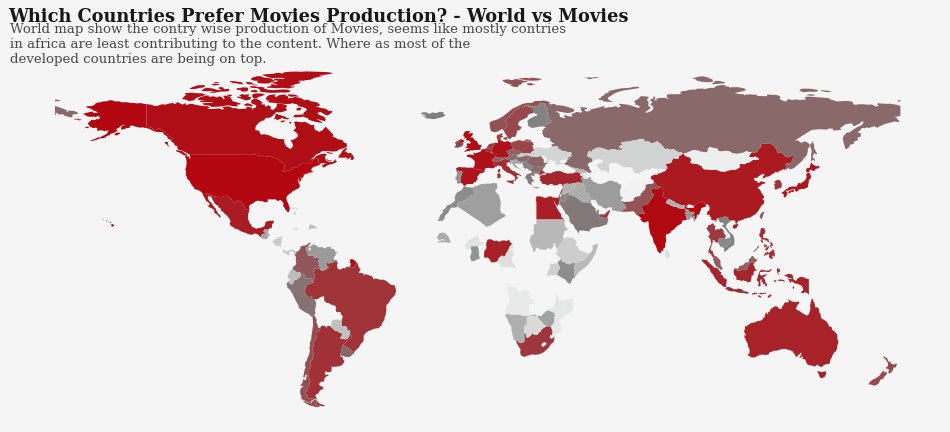

In [21]:
temp = Movi_temp
temp['color'] = temp['count'].apply(lambda x : '#b20710' if x > temp['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
temp['iso_code'] = coco.convert(names=temp['country'], to ='ISO3')
temp = temp[temp['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
temp_map = world.merge(temp,left_on = 'iso_a3', right_on = 'iso_code')

temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
temp_map = temp_map.sort_values(by = 'count', ascending = False)


#viualization
colors = ['#b20710','grey','#f8f9f9',]
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)

fig, ax  = plt.subplots(figsize = (15,7.5), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
temp_map.dropna().plot(column = 'count', 
                       color = temp_map.dropna()['color'], 
                       cmap = cmap,
                       scheme='quantiles', 
                       k=10, legend = False,
                       ax = ax)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.text(-200,104,'Which Countries Prefer Movies Production? - World vs Movies', {'font':'serif', 'size':16, 'weight':'bold'}, alpha = 0.9)
ax.text(-199,87,'World map show the contry wise production of Movies, seems like mostly contries \nin africa are least contributing to the content. Where as most of the \ndeveloped countries are being on top.', {'font':'serif', 'size':12}, alpha = 0.7)
fig.show()

In [22]:
content = df[['type', 'country']]
content['num_countries'] = content['country'].apply(lambda x: len(x.split(',')))
content['International'] = content['num_countries'].apply(lambda x: 1 if x>1 else 0)
dom = content[content['International'] == 0]['type'].value_counts()
inter = content[content['International'] == 1]['type'].value_counts()

inter = content[content['International'] == 1]
dom = content[content['International'] == 0]

inter_t = inter.groupby('type')['International'].count()
dom_t = dom.groupby('type')['International'].count()

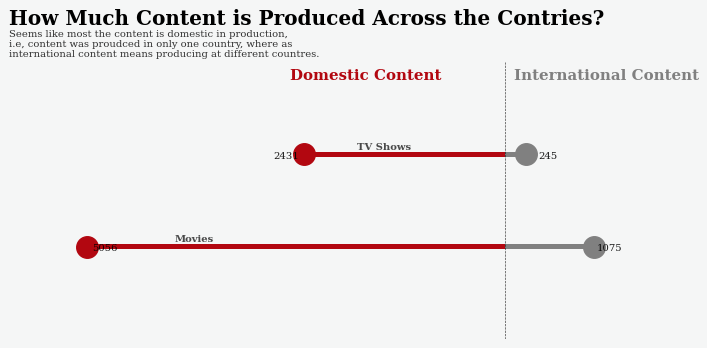

In [23]:
fig,ax = plt.subplots(figsize = (8,4), dpi = 90)
fig.patch.set_facecolor('#f5f6f6')
ax.set_facecolor('#f5f6f6')

ax.barh(y = inter_t.index, width = inter_t.values, height = 0.05, color = ['grey'])
ax.scatter(y = inter_t.index,x=inter_t.values, s = 300,c = ['grey'])
ax.barh(y = dom_t.index, width = - dom_t.values, height = 0.05, color = ['#b20710'],alpha = 1)
ax.scatter(y = dom_t.index,x = - dom_t.values, s = 300,c = ['#b20710'], alpha =1)

ax.axvline(x = 0, ymin = -0.25,ymax=1, **{'color':'black', 'linewidth':0.5, 'linestyle':'--'},alpha = 0.8)



ax.text(-1800,1.05, 'TV Shows', {'font':'serif','weight':'bold', 'size':8}, alpha = 0.7)
ax.text(-2800,0.95, dom_t.values[1], {'font':'serif', 'size':8}, alpha = 0.9)
ax.text(-5000,-0.05, dom_t.values[0], {'font':'serif', 'size':8}, alpha = 0.9)



ax.text(-4000,0.05, 'Movies', {'font':'serif','weight':'bold', 'size':8}, alpha = 0.7)
ax.text(400,0.95, inter_t.values[1], {'font':'serif', 'size':8}, alpha = 0.9)
ax.text(1100,-0.05, inter_t.values[0], {'font':'serif', 'size':8}, alpha = 0.9)

ax.set_ylim([-1,2])



ax.text(-2600,1.8, 'Domestic Content', {'font':'serif','weight':'bold', 'color':'#b20710','size':12}, alpha = 1)
ax.text(100,1.8, 'International Content', {'font':'serif','weight':'bold', 'color':'grey','size':12}, alpha = 1)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)


ax.text(-6000, 2.4, 'How Much Content is Produced Across the Contries?',{'font':'serif','weight':'bold', 'color':'black','size':16}, alpha = 1)
ax.text(-6000, 2.05, 'Seems like most the content is domestic in production, \ni.e, content was proudced in only one country, where as \ninternational content means producing at different countres.',{'font':'serif', 'color':'black','size':8}, alpha = 0.8)
    
fig.show()

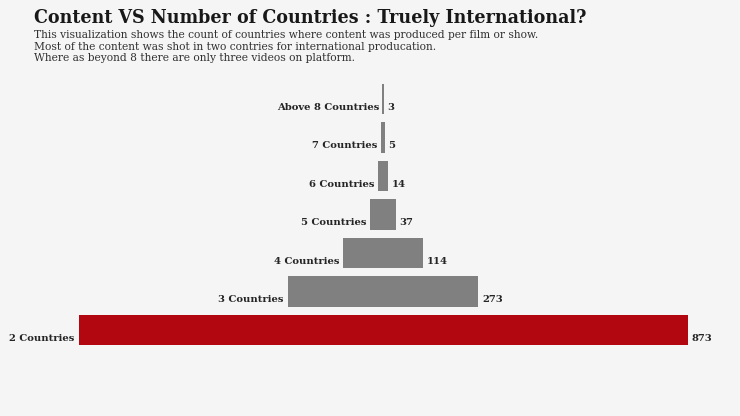

In [24]:
num_countries = content['num_countries'].value_counts()

fig, ax = plt.subplots(figsize = (10,5),dpi = 90)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

###bars left
color = ['#b20710','grey','grey','grey','grey','grey','grey']
ax.barh(y =  num_countries[1:-2].index  , width =num_countries[1:-2].values,  height = 0.8,color =color )
ax.barh(y =  8  , width = 3,  height = 0.8,color = 'grey')
#bars right
ax.barh(y =  num_countries[1:-2].index  , width = -num_countries[1:-2].values,  height = 0.8,color = color)
ax.barh(y =  8 , width = - 3,  height = 0.8,color = 'grey')


for i,j in num_countries.items():
    if (i >1 and i < 8):
        ax.text(j+10,i - 0.25, j, {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        ax.text(- (j+200),i -0.25,'{} Countries'.format(i), {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        
    if i == 8:
        ax.text(3 +10,i-0.25,3, {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        ax.text(- (3 +300),i-0.25,'Above 8 Countries', {'font':'serif', 'size':8, 'color':'black','weight':'bold'}, alpha = 0.85)
        

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)

#plt.title('Number of contries for international content count plot')
ax.set_xlim([-1000,1000])
ax.set_ylim([0,9])

ax.text(- 1000, 10, 'Content VS Number of Countries : Truely International?',{'font':'serif', 'size':14, 'color':'black','weight':'bold'}, alpha = 0.9)
ax.text(-1000,9, 'This visualization shows the count of countries where content was produced per film or show. \nMost of the content was shot in two contries for international producation. \nWhere as beyond 8 there are only three videos on platform.',
       {'font':'serif', 'size':8.5, 'color':'black'}, alpha = 0.8)
fig.show()

In [25]:
## genere count 

def genere(what):
    if what == 'all':
        genere = df.listed_in.value_counts()
    else:
        genere = df[df['type'] == what].listed_in.value_counts()
    gener = {}
    
    for idx, val in genere.items():
        l = idx.split(',')
        for i in l:
            i = i.strip()
            if i in gener.keys():
                d = {}
                d[i] = val + gener[i]
                gener.update(d)
            else:
                d = {i:val}
                gener.update(d)
    theme, count = [],[]
    
    for idx, val in gener.items():
        theme.append(idx)
        count.append(val)
    
    list_temp = (pd.DataFrame({'genere':theme, 'count': count})
        .sort_values('count', ascending = True))
    list_temp.reset_index(drop = True, inplace = True)
    
    return list_temp
tv_genere = genere('TV Show')
mov_genere = genere('Movie')

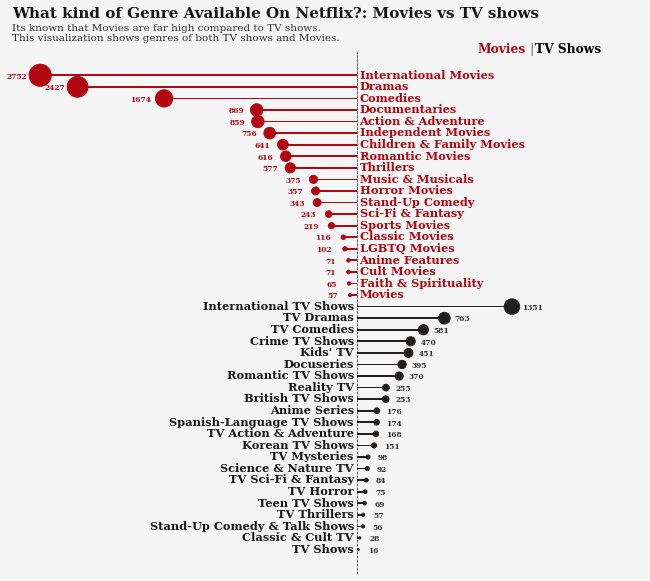

In [26]:
fig, ax  = plt.subplots(figsize = (12,10), dpi =68)

colors = ['#b20710']
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh( y = tv_genere['genere'], width = tv_genere['count'], height = 0.15, color = ['#221f1f'])
ax.scatter( y = tv_genere['genere'], x =  tv_genere['count'], s = tv_genere['count'] * 0.2, c = '#221f1f')

ax.barh( y = mov_genere['genere'], width = - mov_genere['count'], height = 0.15, color = ['#b20710'])
ax.scatter( y = mov_genere['genere'], x =  -mov_genere['count'], s=mov_genere['count']*0.2 , c = '#b20710')

ax.axvline(x = 0, ymin = 0, ymax = 1, **{'linewidth':0.8, 'linestyle': '--', 'color' : 'black'}, alpha = 0.8)

tv_index = tv_genere['genere']
mov_index = mov_genere['genere']

tv_count = tv_genere['count']
mov_count = mov_genere['count']

for y_loc in range(0,22):
        ax.text(-25, y_loc - 0.25 , tv_index[y_loc],horizontalalignment= 'right',**{'font':'serif', 'size':12, 'weight':'bold', 'color':'black'}, alpha = 0.9)
        ax.text(tv_count[y_loc] + 85, y_loc - 0.25, tv_count[y_loc],horizontalalignment= 'left',**{'font':'serif', 'size':8, 'weight':'bold', 'color':'black'}, alpha = 0.8)
        
        
for y_loc in range(0,20):
        ax.text(25, 22+y_loc - 0.25, mov_index[y_loc],horizontalalignment = 'left',**{'font':'serif', 'size':12, 'weight':'bold', 'color':'#b20710'}, alpha =1)
        ax.text(-mov_count[y_loc] - 110,  22 + y_loc - 0.25 , mov_count[y_loc],horizontalalignment= 'right',**{'font':'serif', 'size':8, 'weight':'bold', 'color':'#b20710'}, alpha =1)
    
for loc in ['left', 'right', 'top', 'bottom']:
    ax.spines[loc].set_visible(False)
    
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.set_xlim([-3000,2500])

ax.text(-3000, 46, 'What kind of Genre Available On Netflix?: Movies vs TV shows',{'font':'serif', 'size':16, 'weight':'bold', 'color':'black'}, alpha = 0.9)
ax.text(-3000, 44, 'Its known that Movies are far high compared to TV shows. \nThis visualization shows genres of both TV shows and Movies.',{'font':'serif', 'size':11, 'color':'black'}, alpha = 0.8)

ax.text(1050, 43, 'Movies',{'font':'serif', 'size':13, 'color':'#b20710', 'weight':'bold'}, alpha = 1)
ax.text(1500, 43, '|',{'font':'serif', 'size':13, 'color':'grey','weight':'bold'}, alpha = 1)
ax.text(1550, 43, 'TV Shows',{'font':'serif', 'size':13, 'color':'black', 'weight':'bold'}, alpha = 1)

fig.show()

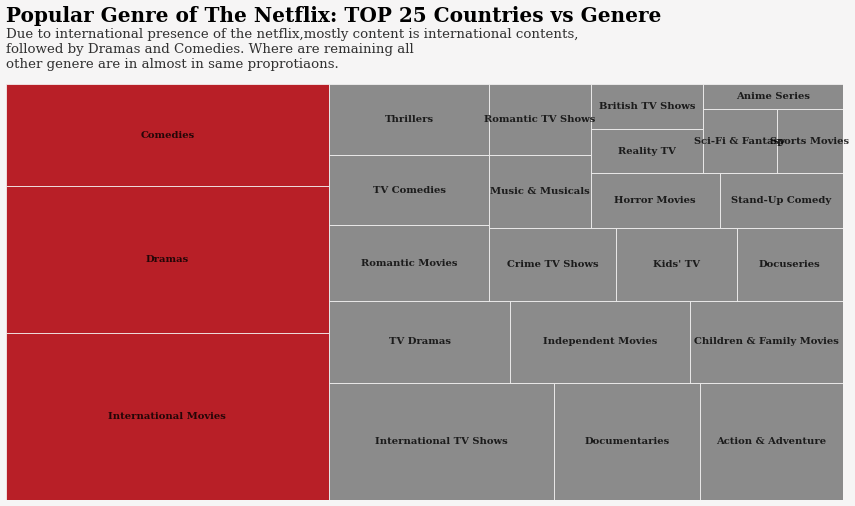

In [27]:
list_temp = genere('all')
list_temp = list_temp.sort_values(by = 'count', ascending = False).reset_index(drop = True)
list_temp['color'] = list_temp['count'].apply(lambda x : '#b20710' if x > list_temp['count'].values[3] else 'grey')
# visulaization
fig, ax = plt.subplots(figsize = (18,9), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= list_temp['count'][0:24], label = list_temp['genere'][0:24], ax = ax, color = list_temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':12, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'Popular Genre of The Netflix: TOP 25 Countries vs Genere',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,104, 'Due to international presence of the netflix,mostly content is international contents, \nfollowed by Dramas and Comedies. Where are remaining all \nother genere are in almost in same proprotiaons.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

In [28]:
listed_type = df[['type', 'listed_in']]

listed_type['num_genre'] = listed_type['listed_in'].apply(lambda x: len(x.split(',')))
listed_type['multi_genre'] = listed_type['num_genre'].apply(lambda x: 1 if x > 2 else 0)

listed_type.drop(columns = ['listed_in'], inplace = True)

tv_multi = listed_type[listed_type['type'] == 'TV Show']['multi_genre'].value_counts()
mv_multi = listed_type[listed_type['type'] == 'Movie']['multi_genre'].value_counts()

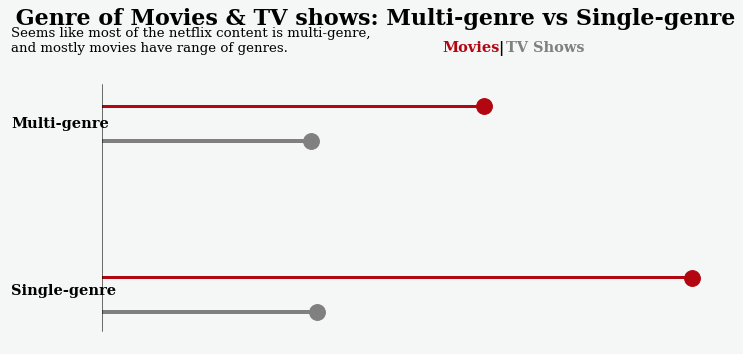

In [29]:

fig, ax = plt.subplots(figsize = (10,5), dpi = 80)
fig.patch.set_facecolor('#f5f6f6')
ax.set_facecolor('#f5f6f6')

ax.barh( y = [2,2.25], width = tv_multi.values, height = 0.0055, color = 'grey' )
ax.barh(y = [2.05,2.3], width = mv_multi.values,height = 0.0052, color = colors )
ax.scatter(y = [2,2.25], x = tv_multi.values, s = 200, c = 'grey' )
ax.scatter(y = [2.05,2.3], x = mv_multi.values, s = 200, c = colors )

ax.axvline(ymin = 0.05, ymax = 0.85, x = 0, **{'linewidth':0.5},color = 'black',alpha = 1)



ax.text(-590,2.42, ' Genre of Movies & TV shows: Multi-genre vs Single-genre', {'font':'serif','weight':'bold','size':20})
ax.text(-570,2.38, 'Seems like most of the netflix content is multi-genre, \nand mostly movies have range of genres.', {'font':'serif','size':12})

ax.text(-570,2.27, 'Multi-genre', {'font':'serif','size':13, 'weight':'bold'})
ax.text(-570,2.025, 'Single-genre', {'font':'serif','size':13, 'weight':'bold'})



ax.text(2150, 2.38, 'Movies',{'font':'serif', 'size':13, 'color':'#b20710', 'weight':'bold'}, alpha = 1)
ax.text(2500, 2.38, '|',{'font':'serif', 'size':13, 'color':'black','weight':'bold'}, alpha = 1)
ax.text(2550, 2.38, 'TV Shows',{'font':'serif', 'size':13, 'color':'grey', 'weight':'bold'}, alpha = 1)

ax.set_ylim([1.95,2.4])

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','bottom','top']:
    ax.spines[loc].set_visible(False)



fig.show()

In [30]:
duration = df.duration.value_counts()

dur_TV_coun = {}
dur_Movi_coun = {}

for idx,val in duration.items():
    l = idx.split(' ')
    if l[1] == 'Season' or l[1] == 'Seasons':
        d = {idx.split(' ')[0] : val}
        dur_TV_coun.update(d)
    else:
        d = {idx.split(' ')[0] : val}
        dur_Movi_coun.update(d)


### tv duration count data
TV_duration, TV_count = [],[]
for idx, val in dur_TV_coun.items():
    TV_duration.append(idx)
    TV_count.append(val)

TV_duration_temp = (pd.DataFrame({'TV_duration': TV_duration, 'TV_count': TV_count})
        .sort_values('TV_count', ascending = False))

TV_duration_temp.reset_index(drop = True, inplace = True)
   
    
### movies duration count data

Movie_duration, Movie_count = [],[]
for idx, val in dur_Movi_coun.items():
    Movie_duration.append(idx)
    Movie_count.append(val)

Movie_duration_temp = (pd.DataFrame({'Movie_duration': Movie_duration, 'Movie_count': Movie_count})
        .sort_values('Movie_count', ascending = False))

Movie_duration_temp.reset_index(drop = True, inplace = True)



Movie_duration_temp['Movie_duration'] = Movie_duration_temp['Movie_duration'].astype('int64')
Movie_duration_temp['Movie_category'] = pd.cut(Movie_duration_temp['Movie_duration'], 
                                               bins = [0,30,60,90,120,150,180,210,240, 2000],
                                               labels = ['below 30 mins', 'between 30 and 60 mins',
                                                         'between 60 and 90 mins' ,
                                                         'between 90 and 120 mins',
                                                         'between 120 and 150 mins',
                                                         'between 150 and 180 mins',
                                                         'between 210 and 240 mins',
                                                         'between 240 and 1000 mins',
                                                         'above 1000 mins'])

ValueError: number of labels (10) does not match number of bars (15).

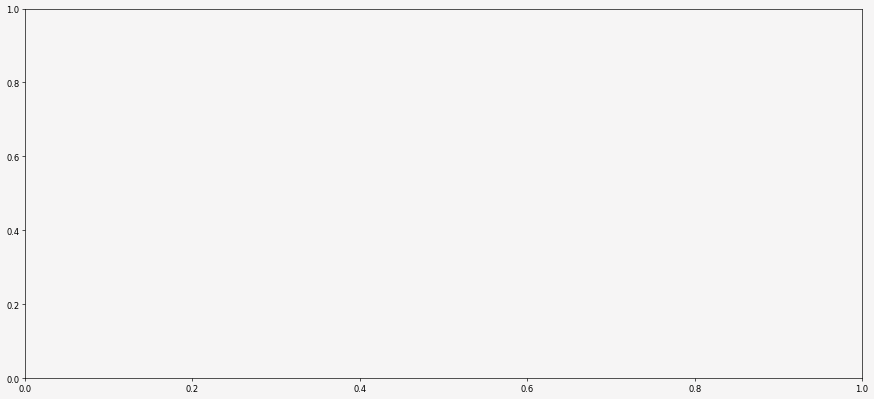

In [31]:
# squarify

TV_duration_temp['color'] = TV_duration_temp['TV_count'].apply(lambda x : '#b20710' if x > TV_duration_temp['TV_count'].sort_values()[3] else 'grey')
# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= TV_duration_temp['TV_count'][0:24], label = TV_duration_temp['TV_duration'][0:10] + "'S", ax = ax, color = TV_duration_temp['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,115,'How deep TV content goes on Netflix?: Number of Seasons Available. ',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)
ax.text(0,110, 'Seems like most of the content having only one season, as the duration of show increasing its number went down.',
       {'font':'serif', 'size':16, 'color':'black'}, alpha = 0.8)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

In [ ]:
fig = plt.figure(figsize = (10,8), dpi = 70)

fig.patch.set_facecolor('#f5f6f6')

gs = fig.add_gridspec(4,4)
gs.update(wspace = 0., hspace = 0.2)

ax1 = fig.add_subplot(gs[0,0:3])
ax2 = fig.add_subplot(gs[1:4,0:3])
ax3 = fig.add_subplot(gs[1:4, 3:4])


axes = [ax1, ax2, ax3]

for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.get_xaxis().set_visible(False)
    for loc in ['left', 'right', 'top','bottom']:
        ax.spines[loc].set_visible(False)

ax2.axes.get_xaxis().set_visible(True)
ax2.axes.get_yaxis().set_visible(True)
ax1.axes.get_xaxis().set_visible(True)
ax1.spines['bottom'].set_visible(True)
ax3.axes.get_yaxis().set_visible(True)
ax1.spines['bottom'].set_visible(True)
sns.kdeplot( x = 'Movie_duration',data = Movie_duration_temp, ax = ax1, shade = True, color = colors[0], alpha = 0.8)
sns.kdeplot( y = 'Movie_count', data = Movie_duration_temp, ax = ax3, shade = True, color = 'grey', alpha = 0.8)
sns.kdeplot(x = 'Movie_duration', y = 'Movie_count', data = Movie_duration_temp, ax =ax2, color = colors[0], shade  = True)

ax2.set_xlabel('Movie Duration',{'font':'serif', 'size':14, 'weight':'bold', })
ax2.set_ylabel('Movie Count',{'font':'serif', 'size':14, 'weight':'bold', })
ax3.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xticks(ticks = [])
ax2.set_yticks(ticks = [])

ax1.set_xticks(ticks = np.arange(0, 350, 75))
ax1.set_xticklabels(np.arange(0, 350, 75),**{'font':'serif', 'size':10, 'weight':'bold', })
ax3.set_yticks(ticks = np.arange(-25, 150, 50))
ax3.set_yticklabels(np.arange(-25, 150, 50),**{'font':'serif', 'size':10, 'weight':'bold', })

ax1.text(-250, 0.0070,'How Movie Duration effects on Content?: Duration VS Availabilty',{'font':'serif', 'size':16, 'weight':'bold', })
ax1.text(-250,0.0058,'Seems like higher the duration of the movies,lower to find them on platform. \nMost of the content available in the range of 25 mins to 200 mins.',
        {'font':'serif', 'size':12, 'weight':'normal'},alpha = 0.8 )
fig.show()

In [ ]:
data  = Movie_duration_temp['Movie_category'].value_counts()


# initialize the figure
fig = plt.figure(figsize=(14,7), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
ax = plt.subplot(polar=True)
plt.axis('off')


labels = ['60 to 90 Mins', '90 to 120 Mins',
         '120 to 150 Mins', '30 to 60 Mins',
          '150 to 180 Mins', 'Below 30 mins',
          '210 to 240 Mins', '240 to 1000 Mins',
          'Above 1000 mins']

colors = ['#b20710', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey', 'grey','grey']


# Constants = parameters controling the plot layout:
upperLimit = 200
lowerLimit = 2
labelPadding = 2

# Compute max and min in the dataset
max = data.max()

slope = (max - lowerLimit) / max
heights = slope * data.values + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(data.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(data)+1))
angles = [element * width for element in indexes]


# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="#f6f5f5",
    color = colors,
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, labels):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle,
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor",**{'font':'serif', 'size':9, 'weight':'bold','color':'black'},alpha = 0.9) 

fig.text(0.25,1.1,'Movie Duration and Count - Best Duration for films!!',{'font':'serif', 'size':20, 'weight':'bold','color':'black'})
fig.text(0.25,1.05,'Medium length movies are mostly available on Netflix. \nLengthy movies are quite rare and least available on Netflix.',{'font':'serif', 'size':12,'color':'black'}, alpha = 0.7)
fig.show()

In [ ]:
cast = df[['cast', 'type', 'title']]
cast_names = cast['cast']


names_dict = {}

for names in cast_names:
    names = names.split(',')
    for name in names:
        if name in names_dict.keys():
            d = {}
            d[name] = names_dict[name] + 1
            names_dict.update(d)
        else:
            d = {}
            d[name] = 1
            names_dict.update(d)

actor, roles = [], []
for key, value in names_dict.items():
    actor.append(key)
    roles.append(value)
    
cast_temp = (pd.DataFrame({'Actor':actor, 'Roles':roles})
             .sort_values('Roles', ascending = False))
cast_temp.reset_index(drop = True, inplace = True)

In [ ]:
cast_temp = cast_temp.sort_values(by = 'Roles', ascending = False).reset_index(drop = True)
fig,ax = plt.subplots(figsize =(10,10),dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh(y = cast_temp.Actor[1:30], width =  cast_temp.Roles[1:30], height = 0.2, color = colors[0])
ax.scatter(y = cast_temp.Actor[1:30], x =  cast_temp.Roles[1:30], s = (cast_temp.Roles[1:30]) *2, c = colors[0] )
ax.axvline(x = 0, ymin = 0,ymax = 1, **{'linewidth':1, 'linestyle':'--', 'color':'black'}, alpha = 0.8)

for i, j in zip(cast_temp.Roles[1:30], cast_temp.Actor[1:30]):
    ax.text(i+0.5,j,i,{'font':'serif', 'size':12,'weight':'bold'})


ax.set_yticklabels(cast_temp.Actor[1:30], {'font':'serif', 'size':12,'weight':'bold'})
ax.set_xticklabels(labels = [])
ax.set_xticks(ticks = [])

ax.text(-12, 31, 'Which Cast Appeared in Most in Netflix shows?: Number of roles',{'font':'serif', 'size':18,'weight':'bold'})
plt.box(None)

fig.show()


In [ ]:
cast_single = cast.cast.value_counts()
x = cast_single[1:50].index,
y = cast_single[1:50].values

fig,ax = plt.subplots(figsize =(10,10),dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh(y = range(1,50), width =  y, height = 0.2, color = colors[0])
ax.scatter(y = range(1,50), x =  y, s = (y) *2, c = colors[0] )
ax.axvline(x = 0, ymin = 0,ymax = 1, **{'linewidth':1, 'linestyle':'--', 'color':'black'}, alpha = 0.8)

for i, j in zip(y,range(1,50)):
    ax.text(i+0.5,j,i,{'font':'serif', 'size':12,'weight':'bold'})

ax.set_yticks(ticks = range(1,50))
ax.set_yticklabels(x[0].tolist()[0:50], {'font':'serif', 'size':8.5,'weight':'bold'})
ax.set_xticklabels(labels = [])
ax.set_xticks(ticks = [])

ax.text(-10, 53, 'Cast Ranking as Whole Cast Team?: Movie Cast Description',{'font':'serif', 'size':18,'weight':'bold'})
plt.box(None)

fig.show()

In [ ]:
x = df.director.value_counts()[1:31].index,
y = df.director.value_counts()[1:31].values

fig,ax = plt.subplots(figsize =(10,10),dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh(y = range(1,31), width =  y, height = 0.2, color = colors[0])
ax.scatter(y = range(1,31), x =  y, s = (y) *4, c = colors[0] )
ax.axvline(x = 0, ymin = 0,ymax = 1, **{'linewidth':1, 'linestyle':'--', 'color':'black'}, alpha = 0.8)

for i, j in zip(y,range(1,31)):
    ax.text(i+0.5,j,i,{'font':'serif', 'size':12,'weight':'bold'})

ax.set_yticks(ticks = range(1,31))
ax.set_yticklabels(x[0].tolist()[0:31], {'font':'serif', 'size':9,'weight':'bold'})
ax.set_xticklabels(labels = [])
ax.set_xticks(ticks = [])

ax.text(-7, 32, 'Which Director Directed Most of the Content?: Contributing Director',{'font':'serif', 'size':18,'weight':'bold'})
plt.box(None)

fig.show()

In [34]:
engine_df = df.copy()

content_cols = ['title','type','director','cast','country','listed_in','description','age_rating']
engine_df = engine_df[content_cols]

engine_df['text_content'] = (engine_df['title'] + " " +engine_df['type']+" " +engine_df['director']+ " "+engine_df['cast']+ " "+
                      +engine_df['country']+ " " +engine_df['listed_in']+ " "+ engine_df['description']+
                      " " +engine_df['age_rating'])

engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace(','," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('&'," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('-',""))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('.'," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.lower())

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

countvect = CountVectorizer()  ### helps in count in words reperated in the text 
count_matrix = countvect.fit_transform(engine_df['text_content']) ## creates nxn count matrix for all the words in corpus
cosine_sim = cosine_similarity(count_matrix)

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'



def recommend_me(my_title, n = 10, verbose = True):
    "my_title: Name of the show \
     n: number of recommendations"
    
    if n > 30:
        n = 30
    def get_title_from_index(index):
        return engine_df[engine_df.index == index]['title'].values[0]
    def get_index_from_title(title):
        return engine_df[engine_df['title'] == title].index.values[0]
    
    try:
        index_ = get_index_from_title(my_title)
        similar_movies = list(enumerate(cosine_sim[index_]))
        sorted_similar_movies = (sorted(similar_movies, key = lambda x: x[1], 
                                    reverse = True ))[1:] ## sorting based on second element of tuple and removing self
        recommend = []
        print(bcolors.BOLD + bcolors.WARNING +'Top {} Recommendations for you because you liked {}:'.format(n, my_title) + bcolors.ENDC)
    
        for count,val in enumerate(sorted_similar_movies):
            if count >n:
                break
            recommended_ = get_title_from_index(val[0])
            recommend.append(recommended_)
            if verbose:
                print(bcolors.BOLD + bcolors.OKBLUE + recommended_)
            
    except:
        print(bcolors.BOLD + bcolors.WARNING +'There is no content is available as per your liking. May be give me title available on NETFLIX'+ bcolors.ENDC)
    return None#recommend

recommend_me('Altered Carbon',10)

Top 10 Recommendations for you because you liked Altered Carbon:
Get Shorty
Van Helsing
Jack Taylor
Shooter
Argon
After Life
The Mole
Twice Upon A Time
You
Love Rhythms - Accidental Daddy
Familiar Wife


In [33]:
pip install -U scikit-learn

  Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp311-cp311-win_amd64.whl (9.2 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.
